# Визуализация с помощью библиотеки Matplotlib

Matplotlib — мультиплатформенная библиотека для визуализации данных, основанная на массивах библиотеки NumPy и спроектированная в расчете на работу с обширным стеком SciPy. Она была задумана Джоном Хантером в 2002 году и изначально представляла собой патч к оболочке IPython, предназначенный для реализации возможности интерактивного построения с помощью утилиты gnuplot графиков в стиле MATLAB из командной строки IPython. Создатель оболочки IPython Фернандо Перес в этот момент был занят завершением написания диссертации, он сообщил Джону, что в ближайшие несколько месяцев у него не будет времени на анализ патча. Хантер принял это как благословение на самостоятельную разработку — так родился пакет Matplotlib, версия 0.1 которого была выпущена в 2003 году. 

Институт исследований космоса с помощью космического телескопа (Space Telescope Science Institute, занимающийся управлением телескопом «Хаббл») финансово поддержал разработку пакета Matplotlib и обеспечил расширение его возможностей, избрав в качестве пакета для формирования графических изображений.

Одна из важнейших возможностей пакета Matplotlib — хорошая совместимость с множеством операционных систем и графических прикладных частей. Matplotlib поддерживает десятки прикладных частей и типов вывода, а значит, можно полагаться на него независимо от используемой операционной системы или требуемого формата вывода. Самая сильная сторона пакета Matplotlib — кросс-платформенный подход типа «все для всех», который привел к росту пользователей, что, в свою очередь, стало причиной появления большого числа активных разработчиков, увеличения возможностей инструментов пакета Matplotlib и его распространенности в мире научных вычислений на языке Python.

В последние годы интерфейс и стиль библиотеки Matplotlib начали несколько устаревать. На фоне новых утилит, таких как ggplot и ggvis в языке R, а также наборов веб-инструментов визуализации, основанных на холстах D3js и HTML5, она кажется нееуклюжей и старомодной. 

Свежие версии Matplotlib упрощают настройку новых глобальных стилей вывода графики. Разрабатываются новые пакеты, предназначенные для работы с ней через более современные и «чистые» API, например Seaborn, [ggplot](http://ggplot.yhathq.com/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/).

In [1]:
import matplotlib.pyplot as plt

Для выбора подходящих стилей для наших графиков мы будем применять директиву plt.style . В следующем фрагменте кода мы задаем директиву classic , которая
обеспечит в создаваемых нами графиках классический стиль библиотеки Matplotlib:

In [2]:
plt.style.use('classic')

Включение в блокнот интерактивных графиков:

In [ ]:
#%matplotlib notebook

Включение в блокнот статических изображений:

In [3]:
%matplotlib inline

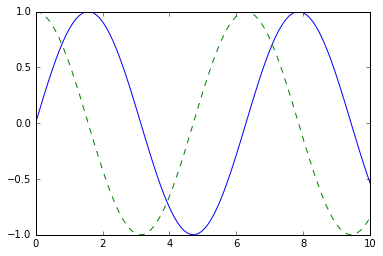

In [5]:
import numpy as np
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [6]:
fig.savefig('my_figure.png')

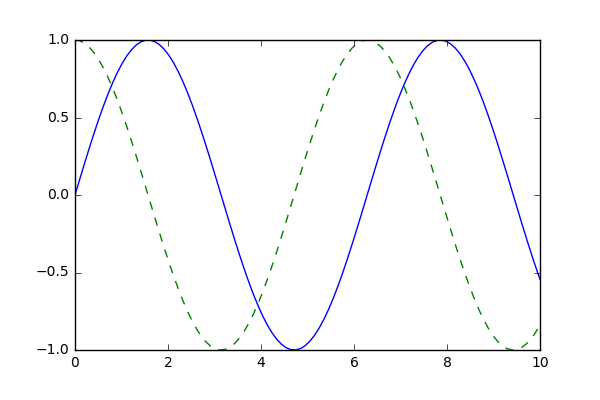

In [7]:
from IPython.display import Image
Image('my_figure.png')

Команда savefig() определяет формат файла, исходя из расширения заданного
имени файла. В зависимости от установленной в вашей системе прикладной части
может поддерживаться множество различных форматов файлов. Вывести список
поддерживаемых форматов файлов для вашей системы вы можете с помощью
следующего метода объекта canvas рисунка:

In [8]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

### Интерфейс в стиле MATLAB

Библиотека Matplotlib изначально была написана как альтернативный вариант (на языке Python) для пользователей пакета MATLAB, и значительная часть ее синтаксиса отражает этот факт. MATLAB-подобные инструменты содержатся в интерфейсе pyplot ( plt ). Например, следующий код, вероятно, выглядит довольно знакомо пользователям MATLAB:

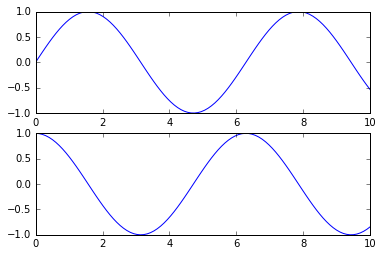

In [9]:
plt.figure() # Создаем рисунок для графика

# Создаем первую из двух областей графика и задаем текущую ось
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# Создаем вторую область и задаем текущую ось
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Важно отметить, что этот интерфейс сохраняет состояние: он отслеживает текущий
рисунок и его оси координат и для него выполняет все команды plt . Получить на них ссылки можно с помощью команд plt.gcf() (от англ. get current figure — «получить текущий рисунок») и plt.gca() (от англ. get current axes — «получить текущие оси координат»).

Хотя в случае простых графиков этот интерфейс с сохранением состояния быстр и удобен, его использование может привести к проблемам. Например, как после создания второй области рисунка вернуться в первую и добавить что-либо в ней. Сделать это в MATLAB-подобном интерфейсе можно, но довольно громоздким способом. Существует лучший вариант.

### Объектно-ориентированный интерфейс

Объектно-ориентированный интерфейс подходит для более сложных ситуаций, когда вам требуется больше возможностей управления рисунком. В объектно-ориентированном интерфейсе функции рисования не полагаются на понятие текущего рисунка или осей, а являются методами явным образом определяемых объектов Figure и Axes . Чтобы перерисовать предыдущий рисунок с его помощью, можно сделать следующее:

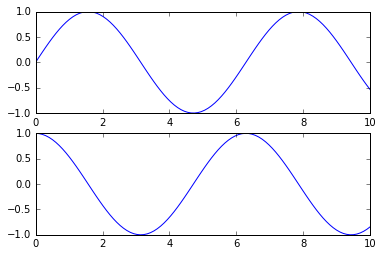

In [10]:
# Сначала создаем сетку графиков
# ax будет массивом из двух объектов Axes
fig, ax = plt.subplots(2)

# Вызываем метод plot() соответствующего объекта
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

В случае более простых графиков выбор интерфейса в основном вопрос личных предпочтений, но по мере усложнения графиков объектно-ориентированный подход становится необходимостью. 

В большинстве случаев в коде приходится всего лишь заменить plt.plot() на ax.plot().

### Простые линейные графики

Начнем с настройки блокнота для построения графиков и импорта функций, которые будем использовать:

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Во всех графиках Matplotlib мы начинаем с создания рисунка и системы координат.
В простейшем случае рисунок и систему координат можно создать следующим образом:

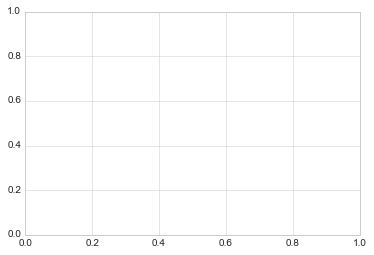

In [12]:
fig = plt.figure()
ax = plt.axes()

В библиотеке Matplotlib можно рассматривать рисунок (экземпляр класса plt.Figure) как единый контейнер, содержащий все объекты, представляющие систему координат, графику, текст и метки. 

Система координат (она же — оси координат, экземпляры класса plt.Axes): ограничивающий  прямоугольник с делениями и метками, в котором потом будут находиться составляющие нашу визуализацию элементы графика.

После создания осей можно применить функцию ax.plot для построения графика данных. Начнем с простой синусоиды:

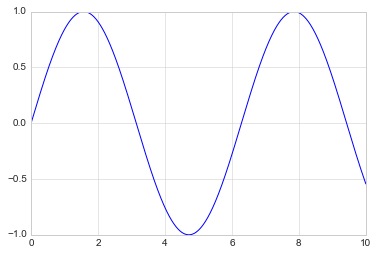

In [14]:
# важно в одной ячейке:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Мы могли бы воспользоваться и интерфейсом pylab , при этом рисунок и система координат были бы созданы в фоновом режиме:

plt.plot(x, np.sin(x));

Если нужно создать простой рисунок с несколькими линиями, можно вызвать функцию plot несколько раз:

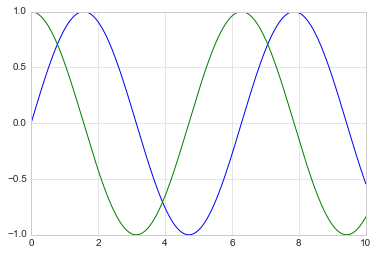

In [17]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Настройка графика: цвета и стили линий

Первое, что вы можете захотеть сделать с графиком, — научиться управлять цветами и стилями линий. Функция plt.plot принимает дополнительные аргументы, которыми можно воспользоваться для этой цели. Для настройки цвета используйте ключевое слово color , которому ставится в соответствие строковый аргумент, задающий практически любой цвет. Задать цвет можно разными способами:

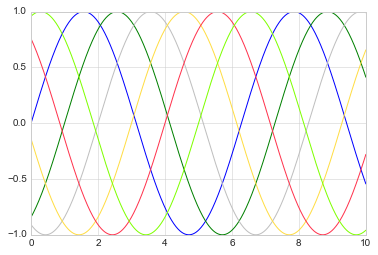

In [18]:
plt.plot(x, np.sin(x - 0), color='blue') # Задаем цвет по названию
plt.plot(x, np.sin(x - 1), color='g') # Краткий код цвета (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # Шкала оттенков серого цвета,
                                         # значения в диапазоне от 0 до 1

plt.plot(x, np.sin(x - 3), color='#FFDD44') # 16-ричный код
                                            # (RRGGBB от 00 до FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # Кортеж RGB, значения 0 и 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # Поддерживаются все названия
                                                # цветов HTML

Если цвет не задан, библиотека Matplotlib будет автоматически перебирать по циклу набор цветов по умолчанию при наличии на графике нескольких линий. Стиль линий можно настраивать и с помощью ключевого слова linestyle:

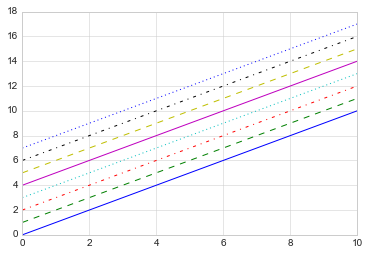

In [19]:
plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# Можно использовать и следующие сокращенные коды:
plt.plot(x, x + 4, linestyle='-') # сплошная линия
plt.plot(x, x + 5, linestyle='--') # штриховая линия
plt.plot(x, x + 6, linestyle='-.') # штрихпунктирная линия
plt.plot(x, x + 7, linestyle=':'); # пунктирная линия

Если вы предпочитаете максимально сжатый синтаксис, можно объединить задание
кодов linestyle и color в одном неключевом аргументе функции plt.plot:

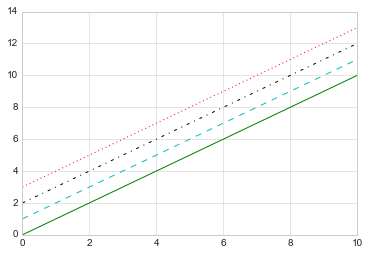

In [20]:
plt.plot(x, x + 0, '-g')   # сплошная линия зеленого цвета
plt.plot(x, x + 1, '--c')  # штриховая линия голубого цвета
plt.plot(x, x + 2, '-.k')  # штрихпунктирная линия черного цвета
plt.plot(x, x + 3, ':r');  # пунктирная линия красного цвета

Эти односимвольные коды цветов отражают стандартные сокращения, принятые
в широко используемых для цифровой цветной графики цветовых моделях RGB
(Red/Green/Blue — «красный/зеленый/синий») и CMYK (Cyan/Magenta/Yellow/
blacK — «голубой/пурпурный/желтый/черный»).

### Настройка графика: пределы осей координат

Библиотека Matplotlib достаточно хорошо подбирает пределы осей координат по умолчанию, но иногда требуется более точная настройка. 

Простейший способ настройки пределов осей координат — методы plt.xlim() и plt.ylim():

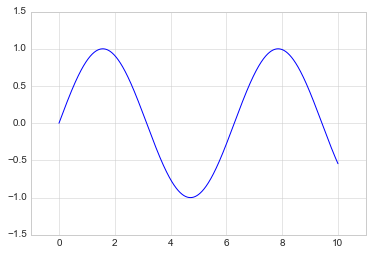

In [21]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

Если вам нужно, чтобы оси отображались зеркально, можно указать аргументы в обратном порядке:

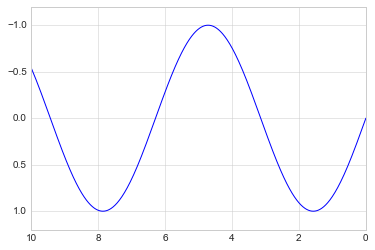

In [22]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

Удобный метод для этих действий — plt.axis() (не перепутайте метод plt.axis()
с методом plt.axes() !). Метод plt.axis() предоставляет возможность задавать пределы осей X и Y с помощью одного вызова путем передачи списка, в котором указываются [xmin, xmax, ymin, ymax]:

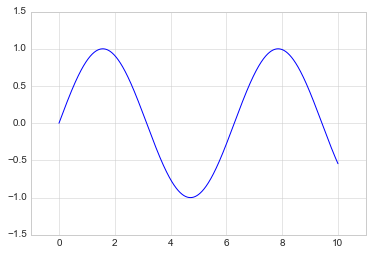

In [23]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Метод plt.axis() умеет даже больше, позволяя вам, например, автоматически подгонять границы к текущему графику:

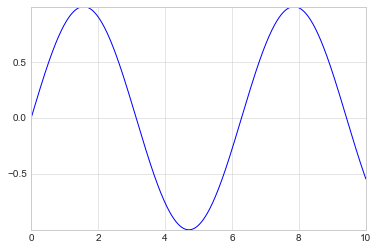

In [24]:
plt.plot(x, np.sin(x))
plt.axis('tight');

### Метки на графиках

Названия и метки осей — простейшие из меток. Существуют методы, позволяющие быстро задать их значения:

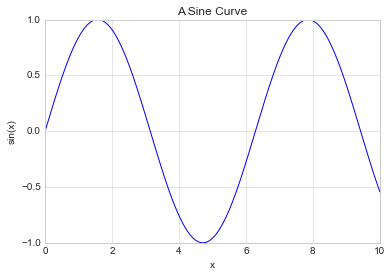

In [25]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve") # Синусоидальная кривая

plt.xlabel("x")
plt.ylabel("sin(x)");

С помощью необязательных аргументов функций можно настраивать расположение, размер и стиль этих меток. 

В случае отображения нескольких линий в одной координатной сетке удобно создать легенду для графика, на которой бы отмечался каждый тип линии. 

В библиотеке Matplotlib для быстрого создания такой легенды имеется встроенный метод plt.legend() . 

Хотя существует несколько возможных способов, проще всего задать метку каждой линии с помощью ключевого слова label функции plot:

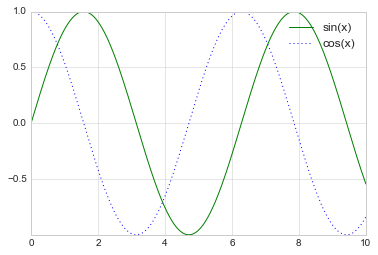

In [26]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('tight')

plt.legend();

Функция plt.legend() отслеживает стиль и цвет линии и устанавливает их соответствие с нужной меткой.

В объектно-ориентированном интерфейсе построения графиков вместо того, чтобы вызывать  функции по отдельности, удобнее воспользоваться методом ax.set(), чтобы задать значения всех этих параметров за один раз:

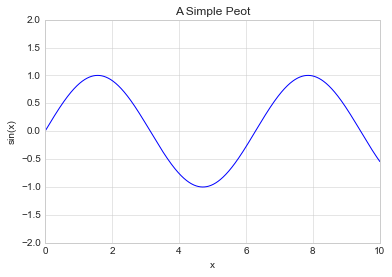

In [27]:
ax = plt.axes()
ax.plot(x, np.sin(x))

ax.set(xlim=(0, 10), 
       ylim=(-2, 2), 
       xlabel='x', 
       ylabel='sin(x)', 
       title='A Simple Peot'); # Простая диаграмма

### Простые диаграммы рассеяния

Еще один часто используемый тип графиков — диаграммы рассеяния, родственные линейным графикам. В них точки не соединяются отрезками линий, а представлены по отдельности точками, кругами или другими фигурами на графике. Начнем с настройки блокнота для построения графиков и импорта нужных нам функций:

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

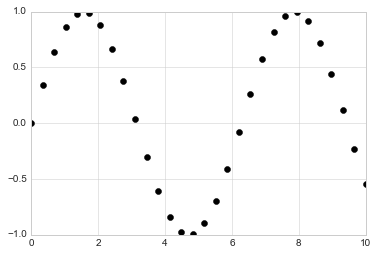

In [29]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Третий аргумент в вызове этой функции описывает тип символа, применяемого для графика. Для управления стилем линии можно использовать такие опции, как '-' и '--' . Для стиля маркера существует свой набор кратких строковых кодов.

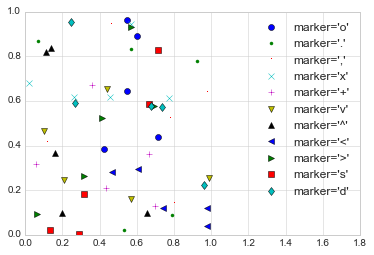

In [31]:
rng = np.random.RandomState(0)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label=f"marker='{marker}'")

plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Эти символьные коды можно использовать совместно с кодами линий и цветов, рисуя точки вместе с соединяющей их линией

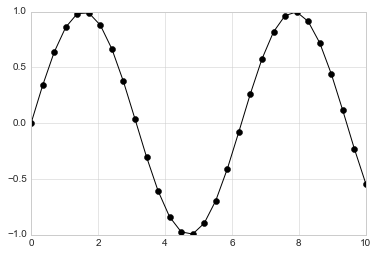

In [32]:
plt.plot(x, y, '-ok'); # линия (-), маркер круга (o), черный цвет (k)

С помощью дополнительных ключевых аргументов функции plt.plot можно задавать множество свойств линий и маркеров:

plt.plot(x, y, '-p', 
         color='gray', 
         markersize=15, 
         linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)

plt.ylim(-1.2, 1.2);     

Еще большими возможностями обладает метод построения диаграмм рассеяния с помощью функции plt.scatter , во многом напоминающей функцию plt.plot:

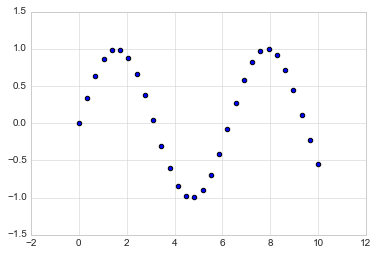

In [34]:
plt.scatter(x, y, marker='o');

Основное различие между функциями plt.scatter и plt.plot состоит в том, что с помощью первой можно создавать диаграммы рассеяния с индивидуально задаваемыми (или выбираемыми в соответствии с данными) свойствами каждой точки (размер, цвет заливки, цвет рамки и т. д.).

Продемонстрируем это, создав случайную диаграмму рассеяния с точками различных цветов и размеров. Чтобы лучше видеть перекрывающиеся результаты, воспользуемся ключевым словом alpha для настройки уровня прозрачности:

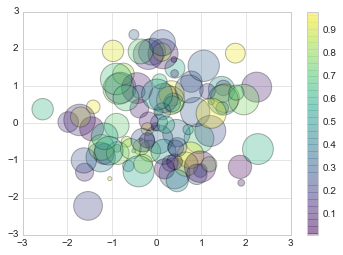

In [35]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # Отображаем цветовую шкалу

Обратите внимание, что цвета автоматически привязываются к цветовой шкале (которую мы отобразили с помощью команды colorbar() ), а размеры указываются в пикселах. Благодаря всему этому можно использовать цвет и размер точек для передачи информации на графике с целью иллюстрации многомерных данных.

### Гистограммы, разбиения по интервалам и плотность

Простая гистограмма может принести огромную пользу при первичном анализе набора данных.

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)

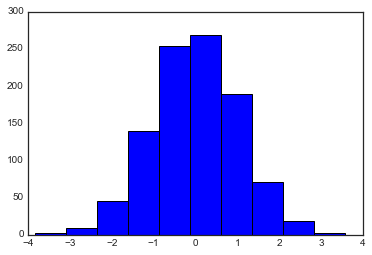

In [37]:
plt.hist(data);

Вот пример гистограммы с детальными пользовательскими настройками:

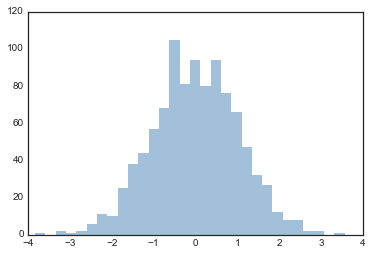

In [39]:
plt.hist(data, bins=30, 
         alpha=0.5,
         histtype='stepfilled', 
         color='steelblue',
         edgecolor='none');

Сочетание опции histtype='stepfilled' с заданной прозрачностью alpha представляется мне очень удобным для сравнения гистограмм нескольких  распределений:

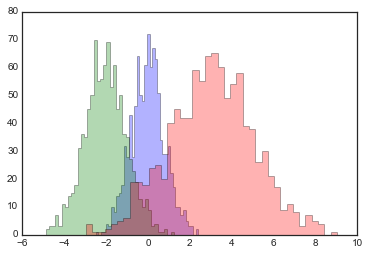

In [41]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', 
              alpha=0.3, 
              bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Если же вам нужно вычислить гистограмму (то есть подсчитать количество точек в заданном интервале) и не отображать ее, к вашим услугам функция np.histogram()

In [42]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 12 185 522 260  21]


### Пользовательские настройки легенд на графиках

Большая понятность графика обеспечивается заданием меток для различных элементов графика. 

С помощью команды plt.legend() можно автоматически создать простейшую легенду для любых маркированных элементов графика:

In [43]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [44]:
%matplotlib inline
import numpy as np

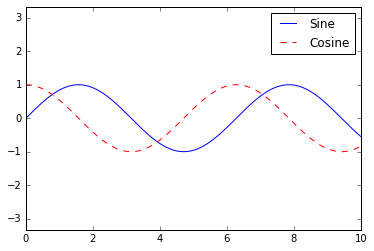

In [45]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), '-b', label='Sine') # Синус
ax.plot(x, np.cos(x), '--r', label='Cosine') # Косинус
ax.axis('equal')

leg = ax.legend();

Например, можно задать местоположение легенды и отключить рамку:

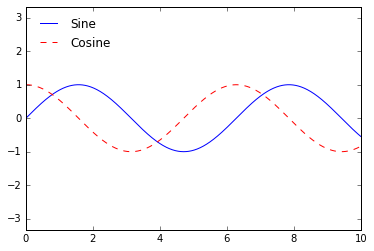

In [46]:
ax.legend(loc='upper left', frameon=False)
fig

Можно также воспользоваться командой ncol , чтобы задать количество столбцов
в легенде:

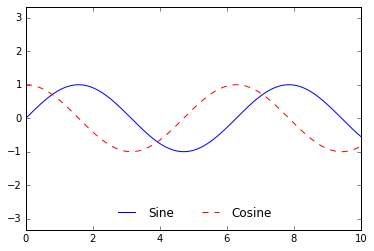

In [47]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

Можно использовать для легенды скругленную прямоугольную рамку ( fancybox )
или добавить тень, поменять прозрачность (альфа-фактор) рамки или поля около
текста:

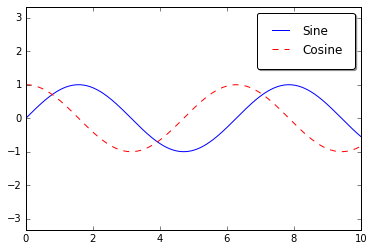

In [48]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Множественные субграфики

Иногда удобно сравнить различные представления данных, разместив их бок о бок.
В библиотеке Matplotlib на такой случай предусмотрено понятие субграфиков
(subplots): несколько маленьких систем координат могут сосуществовать на одном
рисунке. Эти субграфики могут представлять собой вставки, сетки графиков или
еще более сложные схемы размещения.

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### plt.axes: создание субграфиков вручную

Использование функции plt.axes — простейший метод создания систем координат, по умолчанию стандартного объекта для системы координат, заполняющего весь график. 

plt.axes также принимает на входе необязательный аргумент, представляющий собой список из четырех чисел в системе координат рисунка. 

Эти числа означают [низ, левый угол, ширина, высота] в системе координат рисунка, отсчет которых начинается с 0 в нижнем левом и заканчивается 1 в верхнем правом углу рисунка.

Например, мы можем создать «вставную» систему координат в верхнем правом
углу другой системы координат, задав координаты x и y ее местоположения равными 0.65 (то есть начинающимися на 65 % ширины и 65 % высоты рисунка), а ее размеры по осям X и Y равными 0.2 (то есть размер этой системы координат составляет 20 % ширины и 20 % высоты рисунка). 

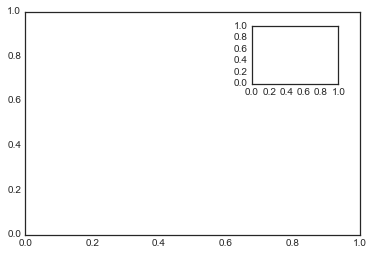

In [50]:
ax1 = plt.axes() # обычные оси координат
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Аналог этой команды в объектно-ориентированном интерфейсе — функция fig.add_axes() . 

Воспользуемся ею для создания двух расположенных друг над другом систем координат: 

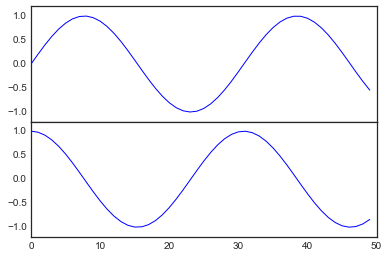

In [51]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                    xticklabels=[], 
                    ylim=(-1.2, 1.2))

ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Мы получили две соприкасающиеся системы координат (верхняя — без делений):
низ верхней области (находящийся на 50 % от размера рисунка) соответствует
верху нижней области (находится на 10 + 40 % от размера рисунка).

### plt.subplot: простые сетки субграфиков

Выровненные столбцы или строки субграфиков бывают нужны достаточно часто для того, чтобы в библиотеку Matplotlib было включено несколько удобных утилит,
облегчающих их создание. Самая низкоуровневая из них — функция plt.subplot ,
создающая отдельный субграфик внутри сетки. Эта команда принимает на входе
три целочисленных аргумента — количество строк, количество столбцов и индекс
создаваемого по такой схеме графика, отсчет которого начинается в верхнем левом
углу и заканчивается в правом нижнем

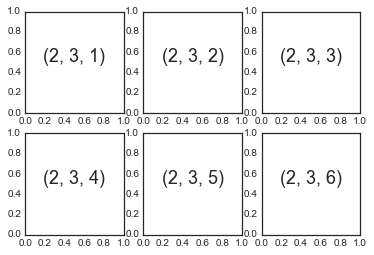

In [52]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

Для настройки размеров полей между этими графиками можно выполнить
команду plt.subplots_adjust.

Следующий код использует эквивалентную объектно-ориентированную команду
fig.add_subplot():

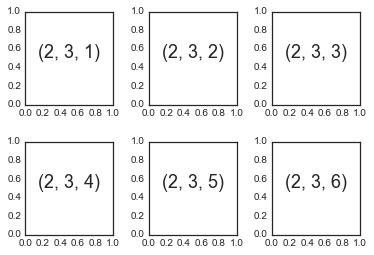

In [54]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center')

Мы воспользовались аргументами hspace и wspace функции plt.subplots_adjust() , позволяющими задать поля по высоте и ширине рисунка в единицах высоты субграфика (в данном случае поля составляют 40 % от ширины и высоты субграфика).

### Функция plt.subplots: создание всей сетки за один раз

Только что описанный подход может оказаться довольно трудоемким при создании
большой сетки субграфиков, особенно если нужно скрыть метки осей X и Y на внутренних графиках. 

В этом случае удобнее использовать функцию plt.subplots() (обратите внимание на букву s в конце subplots ). Вместо отдельного субграфика эта функция создает целую сетку субграфиков одной строкой кода и возвращает их в массиве NumPy. Ее аргументы: количество строк и столбцов, а также необязательные ключевые слова sharex и sharey , позволяющие задавать связи между различными системами координат. 

Здесь мы создаем сетку 2 × 3 субграфиков, в которой у всех систем координат
в одной строке одинаковая шкала по оси Y, а у всех систем координат в одном
столбце — одинаковая шкала по оси X:

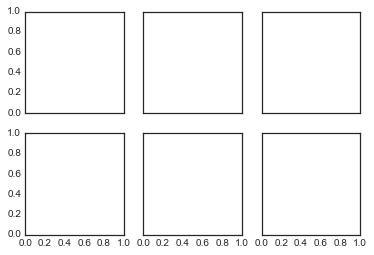

In [55]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Обратите внимание, что указание ключевых слов sharex и sharey приводит к автоматическому удалению внутренних меток с сетки в целях очистки пространства
графика. Итоговая сетка систем координат возвращается в массиве NumPy, что
дает возможность легко ссылаться на требуемую систему координат с помощью
обычной индексации, используемой для массивов:

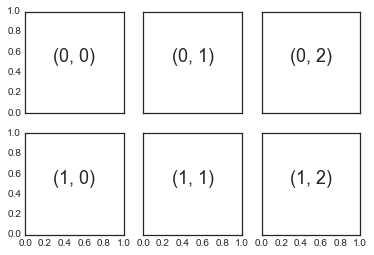

In [56]:
# Системы координат располагаются в двумерном массиве,
# индексируемом по [строка, столбец]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

По сравнению с plt.subplot() функция plt.subplots() намного лучше согласуется
с принятой в языке Python индексацией, начинающейся с 0.

### Стрелки и поясняющие надписи

В следующем фрагменте кода мы используем функцию annotate с несколькими
параметрами:

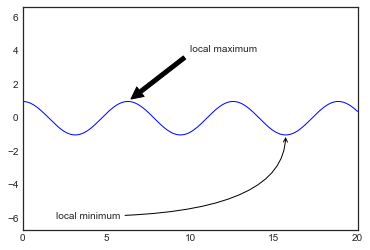

In [57]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
             arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
             arrowprops=dict(arrowstyle="->",
             connectionstyle="angle3,angleA=0,angleB=-90"));

### Пользовательские настройки Matplotlib: конфигурации и таблицы стилей

Рассмотрим некоторые параметры конфигурации среды ( rc ) библиотеки
Matplotlib и новую возможность — таблицы стилей (stylesheets), содержащие неплохие наборы конфигураций по умолчанию:

In [58]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
%matplotlib inline

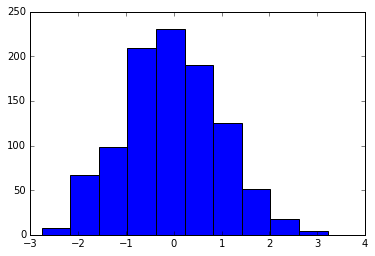

In [59]:
x = np.random.randn(1000)
plt.hist(x);

Мы можем настроить ее вид вручную, превратив эту гистограмму в намного более
приятный глазу график:

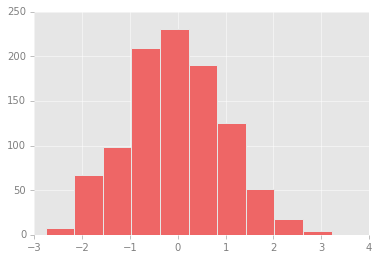

In [61]:
# Используем серый фон
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# Рисуем сплошные белые линии сетки
plt.grid(color='w', linestyle='solid')

# Скрываем основные линии осей координат
for spine in ax.spines.values():
    spine.set_visible(False)

# Скрываем деления сверху и справа
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Осветляем цвет делений и меток
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# Задаем цвет заливки и границ гистограммы
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');    

### Изменяем значения по умолчанию: rcParams

Каждый раз при загрузке библиотеки Matplotlib она описывает конфигурацию
среды ( rc ), содержащую стили по умолчанию для всех создаваемых вами элементов
графиков. Эту конфигурацию можно настроить в любой момент, воспользовавшись
удобной утилитой plt.rc . 

Рассмотрим, как можно модифицировать параметры rc таким образом, чтобы график по умолчанию выглядел схоже с вышеприведенным. 

Начнем с сохранения копии текущего словаря rcParams , чтобы можно было без
опасений восстановить эти значения в текущем сеансе:

In [62]:
IPython_default = plt.rcParams.copy()

Теперь можно воспользоваться функцией plt.rc и изменить некоторые из настроек:

In [63]:
from matplotlib import cycler

colors = cycler('color',
                 ['#EE6666', '#3388BB', '#9988DD',
                  '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
        axisbelow=True, grid=True, prop_cycle=colors)

plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

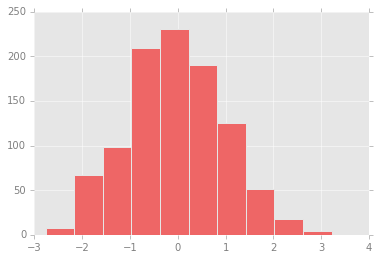

In [64]:
plt.hist(x);

Посмотрим, как выглядят с этими параметрами rc простые графики

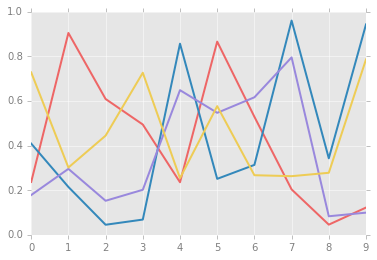

In [65]:
for i in range(4):
    plt.plot(np.random.rand(10))

### Таблицы стилей

Даже если вы и не хотите создать свой собственный стиль, включенные по умолчанию
таблицы стилей очень удобны. Имеющиеся стили перечислены в plt.style.available — для краткости только первые пять:

In [66]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

Простейший способ переключения таблиц стилей — вызвать функцию: plt.style.use('stylename')

Красивые стили: 'fivethirtyeight', 'ggplot', 'bmh', 'dark_background', 'grayscale'.

### Построение трехмерных графиков в библиотеке Matplotlib

Первоначально библиотека Matplotlib была создана в расчете на построение только двумерных графиков. В период выпуска версии 1.0 на основе имевшегося в библиотеке Matplotlib двумерного отображения графиков были созданы некоторые трехмерные утилиты построения графиков, что привело к удобному (хотя и несколько ограниченному в возможностях) набору инструментов для трехмерной визуализации данных. Мы активизируем возможность построения трехмерных графиков путем импорта набора инструментов mplot3d , включенного в основной установочный пакет библиотеки Matplotlib:

In [69]:
from mpl_toolkits import mplot3d

После импорта этого подмодуля появляется возможность создавать трехмерные
системы координат путем передачи ключевого слова projection='3d' любой из
обычных функций создания систем координат:

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn

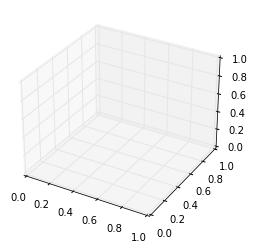

In [85]:
fig = plt.figure()
ax = plt.axes(projection='3d')

С помощью такой трехмерной системы координат можно строить различные виды трехмерных графиков. Построение трехмерных графиков — один из видов функциональности, для которого очень полезен интерактивный, а не статический
просмотр рисунков в блокноте.

In [91]:
%matplotlib inline

### Трехмерные точки и линии

Линейный график и диаграмма рассеяния — простейшие трехмерные графики, создаваемые на основе множеств кортежей из трех элементов (x, y, z). По аналогии
с обсуждавшимися ранее более распространенными двумерными графиками их
можно создать с помощью функций ax.plot3D и ax.scatter3D . 

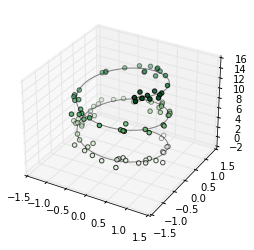

In [92]:
ax = plt.axes(projection='3d')
# Данные для трехмерной кривой
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline, yline, zline, 'gray')

# Данные для трехмерных точек
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Обратите внимание, что по умолчанию степень прозрачности рассеянных по графику точек настраивается таким образом, чтобы придать графику эффект глубины. Хотя в статическом изображении этот трехмерный эффект иногда незаметен, динамическое представление может дать информацию о топологии точек.

# Дополнительно:

- https://nagornyy.me/courses/data-science/intro-to-matplotlib